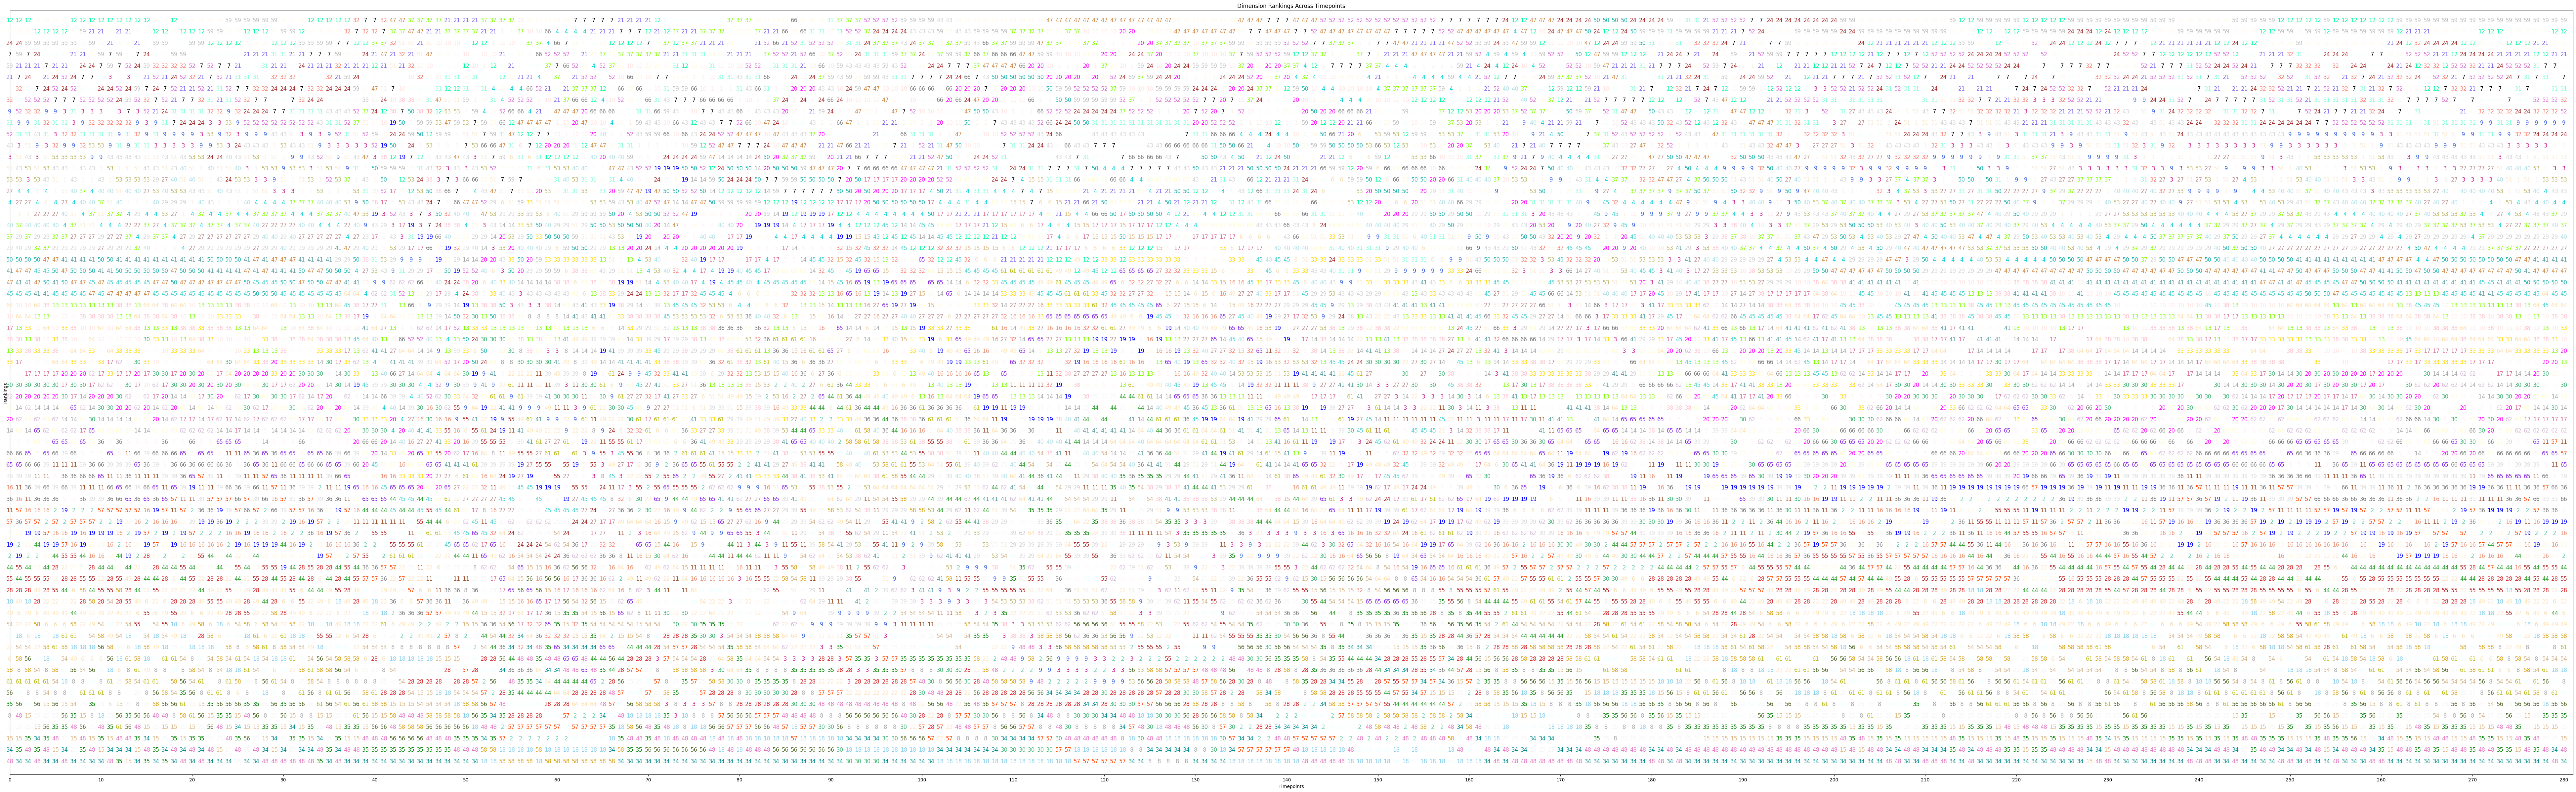

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# change os directory to "../"
import os
os.chdir("../")

from train_dynamic_3d import classnames66

# Load the embeddings and prepare data
emb_pth = "../output/cliphba_dynamic_3d_v4/things/embeddings_-100ms-1300ms-5step.npy"
emb = np.load(emb_pth)
dim_sum = emb.sum(axis=1)  # (281, 66)

d_names = list(np.array(classnames66)[:, 0])  # Dimension names
timepoints = dim_sum.shape[0]  # Number of timepoints
n_dims = dim_sum.shape[1]  # Number of dimensions (66)

# Generate colors for each dimension
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
np.random.shuffle(colors)  # Shuffle to assign unique colors

# Create the plot
plt.figure(figsize=(100, 30))

for t in range(timepoints):
    # Get the ranking of dimensions at each timepoint
    rankings = np.argsort(-dim_sum[t])  # Sort in descending order
    for rank, dim_idx in enumerate(rankings):
        dim_name = f'{dim_idx + 1}' # Get dimension name
        y_pos = n_dims - rank  # Reverse rank to plot top-ranked at higher y
        plt.text(t, y_pos, dim_name, fontsize=12, color=colors[dim_idx], ha='center')

# Customize plot
plt.xlim(0, timepoints)
plt.ylim(0, n_dims + 1)
plt.xlabel('Timepoints')
plt.ylabel('Rankings')
plt.title('Dimension Rankings Across Timepoints')
plt.xticks(ticks=np.arange(0, timepoints, step=10), labels=np.arange(0, timepoints, step=10))
plt.yticks([])  # Hide y-ticks since we have labels
# plt.tight_layout()
plt.show()
